## Azure notebook Setup

In [1]:
#A class attribute that provides access to the TabularDatasetFactory methods for creating new TabularDataset objects. 
#Usage: Dataset.Tabular.from_delimited_files().
from azureml.core import Workspace, Dataset

subscription_id = 'bcfe0c62-8ebe-4df0-a46d-1efcf8739a5b' #check the launch studio there will get this id
resource_group = 'VChamp-Team3' # resource group name
workspace_name = 'vchamp-team3' # worksapce name


# storage account : Algorithmia, Resource group: VChamp-Team3 and workspace: vchamp-team3.
#Constructor
workspace = Workspace(subscription_id, resource_group, workspace_name)

In [2]:
#['data_team3_synthetic_train']
datastore = workspace.datastores['data_team3_synthetic_train'] 

In [3]:
#from_delimited_files (Create a TabularDataset to represent tabular data in delimited files (e.g. CSV and TSV).

dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, 'measurements_train.csv')])

# preview the first 3 rows of the dataset
# dataset.to_pandas_dataframe()

In [4]:
#Converting the dataset into data frame(default as dataset in Azure, thus we must convert the needed formate)
measurements_train_data= dataset.to_pandas_dataframe()

In [5]:
type(measurements_train_data)

pandas.core.frame.DataFrame

In [6]:
measurements_train_data.head()

,Column1,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
0,0,1,59.124538,2003-05-21 00:27:01,Temperature,95.804066,None,Indiana
1,1,1,59.124538,2003-05-21 00:27:01,Pain,3.000000,None,Indiana
2,2,1,59.124538,2003-05-21 00:27:01,Pulse,74.000000,None,Indiana
3,3,1,59.124538,2003-05-21 00:27:01,Respiratory rate,16.000000,None,Indiana
4,4,1,59.124538,2003-05-21 00:27:01,Blood pressure,NaN,140/96,Indiana


----
# Measurements
----

## **Dataset Description:**

- **Internalpatientid:** It represents an internal identifier for each patient. It is likely a unique identifier assigned to each individual in the dataset.

- **Age at measurement:** This column denotes the age of the patient at the time of the measurement. It provides information about the patient's age in a numeric format.

- **Measurement date:** It indicates the date and time when the measurement was taken. It provides the timestamp of the measurement in a specific format.
---
- **Measurement:** This column specifies the type of measurement that was taken. It could include various types of health measurements such as pulse, weight, blood pressure, respiratory rate, pain level, etc.

- **Result numeric:** It represents the numeric result of the measurement. It contains the actual numerical value associated with the specific measurement type.

- **Result textual:** This column holds the textual representation or description of the measurement result. But it only representing blood pressure value in texual.
---
- **State:** This column indicates the state associated with the measurement. It represents the geographical location or state information where the measurement was recorded.


---
## **Content:**

- Reference: Explanation of Features
    - 1. Importing Libraries
    - 2. Data Exploration 
    - 3. Checking for Missing Values
    - 4. Exploring Numerical Variables
    - 5. Exploring Object-Type Features
    - 6. Age-Based Bucketing for Measurements Aggregation and Grouping
         - Checking Missing Values for Grouped columns
    - 7. Loading the Death file
         - Merging Measurement	Result  Grouped Columns and Death File with Left join on using Internalpatientid
         - Checking Missing Values for Death patients
    - 8. Bivariate Analysis for Each Column vs. Death
    - 9. Observations
---

### **Reference: Explanation of Features**

**Measurement(10)**


- **Pain:** Represents the measurement of pain experienced by individuals.
- **Blood pressure:** Captures the measurement of blood pressure, typically consisting of two values - systolic and diastolic.
- **Pulse:** Represents the measurement of pulse rate, indicating the number of times the heart beats per minute.
- **Respiratory rate:** Captures the measurement of the number of breaths taken per minute.
- **Temperature:** Represents the measurement of body temperature, usually recorded in degrees Fahrenheit or Celsius.
- **Pulse oximetry:** Captures the measurement of oxygen saturation levels in the blood.
- **Weight:** Represents the measurement of body weight, typically recorded in units such as pounds or kilograms.
- **Height:** Captures the measurement of a person's height, often recorded in units such as inches or centimeters.
- **Circumference/girth:** Represents measurements of body circumferences or girths, such as waist circumference or hip circumference.
- **Central venous pressure:** Captures the measurement of pressure in the central veins, reflecting blood volume and heart function.

## 1. Importing Libraries

In [7]:
# Importing essential libraries
import pandas as pd        # Library for data manipulation and analysis
import numpy as np         # Library for mathematical operations
import matplotlib.pyplot as plt     # Library for data visualization
import seaborn as sns       # Library for advanced data visualization

## 2. Data Exploration

In [8]:
# Changing variable name for dataframe
df = measurements_train_data

In [9]:
# Display the first few rows of a DataFrame
df.head()

,Column1,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
0,0,1,59.124538,2003-05-21 00:27:01,Temperature,95.804066,None,Indiana
1,1,1,59.124538,2003-05-21 00:27:01,Pain,3.000000,None,Indiana
2,2,1,59.124538,2003-05-21 00:27:01,Pulse,74.000000,None,Indiana
3,3,1,59.124538,2003-05-21 00:27:01,Respiratory rate,16.000000,None,Indiana
4,4,1,59.124538,2003-05-21 00:27:01,Blood pressure,NaN,140/96,Indiana


In [10]:
# Shape of the dataset
df.shape

num_rows = df.shape[0]  # Number of rows
num_cols = df.shape[1]  # Number of columns

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 125247162
Number of columns: 8


In [11]:
# Get the number of unique values in the 'Internalpatientid' column
print("Number of Unique Internalpatientid")
df['Internalpatientid'].nunique()

Number of Unique Internalpatientid


132289

In [12]:
# Dropping unnammed column
df = df.drop(df.columns[0], axis=1)

In [14]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125247162 entries, 0 to 125247161
Data columns (total 7 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Internalpatientid   int64         
 1   Age at measurement  float64       
 2   Measurement date    datetime64[ns]
 3   Measurement         object        
 4   Result numeric      float64       
 5   Result textual      object        
 6   State               object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.5+ GB


- The 'Internalpatientid' column contains integer values and the columns for 'Age at measurement'  and  'Result numeric' are in float format, while the rest of the features are in object format.

- The dataset has some missing values, particularly for the Result numeric and Result textual.  

## 3. Checking Missing Values

In [15]:
# List comprehension to find columns with missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['Result numeric', 'Result textual']

In [16]:
# Count the number of missing values in each column
df.isnull().sum()

Internalpatientid             0
Age at measurement            0
Measurement date              0
Measurement                   0
Result numeric         22866376
Result textual        102403158
State                         0
dtype: int64

### Checking Missing values in Result numeric and  Result textual

### "Result numeric" column contains NaN Count and Non-NaN Count

In [17]:
# Filter rows where "Result numeric" column contains NaN
nan_rows = df[df['Result numeric'].isna()]

# Group by "Measurement" column and aggregate NaN and non-NaN values separately
nan_categories = nan_rows.groupby('Measurement')['Result numeric'].apply(lambda x: x.isna().sum()).reset_index()
non_nan_categories = df[~df['Result numeric'].isna()].groupby('Measurement')['Result numeric'].count().reset_index()

# Merge the NaN and non-NaN categories
merged_categories = pd.merge(nan_categories, non_nan_categories, on='Measurement', how='outer')
merged_categories.columns = ['Measurement', 'NaN Count_Numeric', 'Non-NaN Count_Numeric']

# Print the merged categories
print(merged_categories)

               Measurement  NaN Count_Numeric  Non-NaN Count_Numeric
0           Blood pressure           22601662                     14
1  Central venous pressure              14496                  18270
2      Circumference/girth              22527                  30492
3                   Height              13733                2985507
4                     Pain              29438               23603786
5                    Pulse              36817               21647679
6           Pulse oximetry              38881               11402912
7         Respiratory rate              35485               17642684
8              Temperature              44354               17171045
9                   Weight              28983                7878397


### "Result textual" column contains NaN Count and Non-NaN Count

In [18]:
# Filter rows where "Result textual" column contains NaN
nan_rows = df[df['Result textual'].isna()]

# Group by "Measurement" column and aggregate NaN and non-NaN values separately
nan_categories = nan_rows.groupby('Measurement')['Result textual'].apply(lambda x: x.isna().sum()).reset_index()
non_nan_categories = df[~df['Result textual'].isna()].groupby('Measurement')['Result textual'].count().reset_index()

# Merge the NaN and non-NaN categories
merged_categories = pd.merge(nan_categories, non_nan_categories, on='Measurement', how='outer')
merged_categories.columns = ['Measurement', 'NaN Count_Textual', 'Non-NaN Count_Textual']

# Print the merged categories
print(merged_categories)

               Measurement  NaN Count_Textual  Non-NaN Count_Textual
0           Blood pressure              19321               22582355
1  Central venous pressure              18270                  14496
2      Circumference/girth              30492                  22527
3                   Height            2985883                  13357
4                     Pain           23603902                  29322
5                    Pulse           21647718                  36778
6           Pulse oximetry           11404604                  37189
7         Respiratory rate           17642720                  35449
8              Temperature           17171137                  44262
9                   Weight            7879111                  28269


### Drop columns

In [17]:
# Drop the specified columns from the DataFrame
df.drop(['State'], axis=1,inplace=True)

In [18]:
df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual
0,1,59.124538,2003-05-21 00:27:01,Temperature,95.804066,None
1,1,59.124538,2003-05-21 00:27:01,Pain,3.000000,None
2,1,59.124538,2003-05-21 00:27:01,Pulse,74.000000,None
3,1,59.124538,2003-05-21 00:27:01,Respiratory rate,16.000000,None
4,1,59.124538,2003-05-21 00:27:01,Blood pressure,NaN,140/96
...,...,...,...,...,...,...
125247157,99999,96.341924,2013-04-03 23:21:35,Pulse oximetry,94.000000,None
125247158,99999,96.341924,2013-04-03 23:21:35,Temperature,92.336347,None
125247159,99999,96.341924,2013-04-03 23:21:35,Blood pressure,NaN,141/49
125247160,99999,96.341924,2013-04-03 23:21:35,Respiratory rate,36.000000,None


### Concatenate 2 columns

In [19]:
# Replace NaN values in "Result numeric" with corresponding values from "Result textual"
df['Result'] = df['Result numeric'].fillna(df['Result textual'])

# Print the updated DataFrame
df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,Result
0,1,59.124538,2003-05-21 00:27:01,Temperature,95.804066,None,95.8041
1,1,59.124538,2003-05-21 00:27:01,Pain,3.000000,None,3
2,1,59.124538,2003-05-21 00:27:01,Pulse,74.000000,None,74
3,1,59.124538,2003-05-21 00:27:01,Respiratory rate,16.000000,None,16
4,1,59.124538,2003-05-21 00:27:01,Blood pressure,NaN,140/96,140/96
...,...,...,...,...,...,...,...
125247157,99999,96.341924,2013-04-03 23:21:35,Pulse oximetry,94.000000,None,94
125247158,99999,96.341924,2013-04-03 23:21:35,Temperature,92.336347,None,92.3363
125247159,99999,96.341924,2013-04-03 23:21:35,Blood pressure,NaN,141/49,141/49
125247160,99999,96.341924,2013-04-03 23:21:35,Respiratory rate,36.000000,None,36


In [20]:
# Drop the specified columns from the DataFrame
df.drop(['Result numeric','Result textual'], axis=1,inplace=True)

In [21]:
df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result
0,1,59.124538,2003-05-21 00:27:01,Temperature,95.8041
1,1,59.124538,2003-05-21 00:27:01,Pain,3
2,1,59.124538,2003-05-21 00:27:01,Pulse,74
3,1,59.124538,2003-05-21 00:27:01,Respiratory rate,16
4,1,59.124538,2003-05-21 00:27:01,Blood pressure,140/96
...,...,...,...,...,...
125247157,99999,96.341924,2013-04-03 23:21:35,Pulse oximetry,94
125247158,99999,96.341924,2013-04-03 23:21:35,Temperature,92.3363
125247159,99999,96.341924,2013-04-03 23:21:35,Blood pressure,141/49
125247160,99999,96.341924,2013-04-03 23:21:35,Respiratory rate,36


### Removing 'Unavailable', 'Refused', 'Pass' values

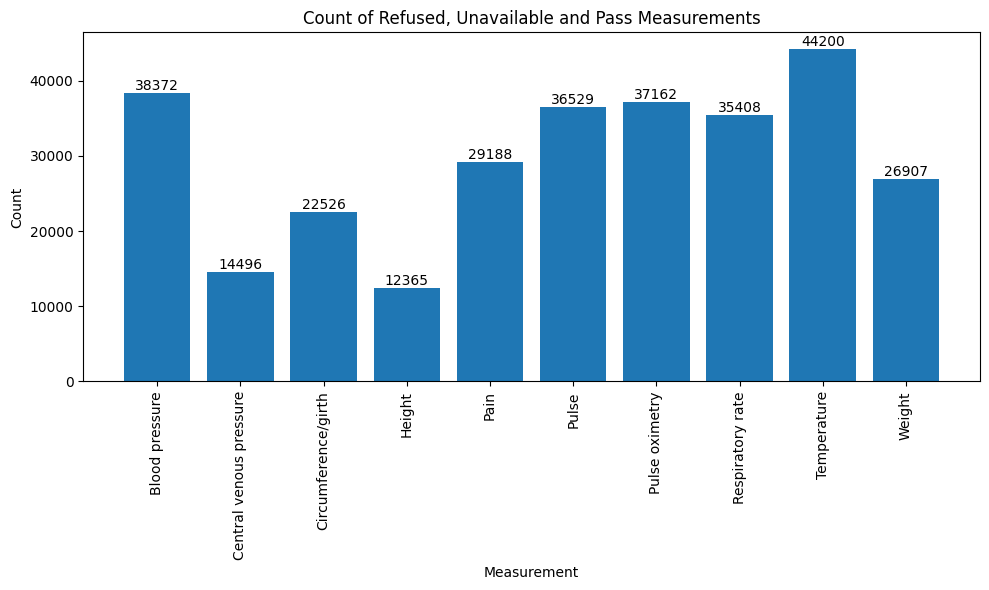

In [33]:
# Filter the dataframe for 'Refused' or 'Unavailable' values in 'Result textual'
filtered_df = df[df['Result'].isin(['Refused', 'Unavailable', 'Pass'])]

# Group the filtered dataframe by 'Measurement' and count the occurrences
count_by_measurement = filtered_df.groupby('Measurement').size()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(count_by_measurement.index, count_by_measurement.values)

# Display count values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.xlabel('Measurement')
plt.ylabel('Count')
plt.title('Count of Refused, Unavailable and Pass Measurements')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
removing_category = ['Unavailable', 'Refused', 'Pass']
df = df.dropna(subset=['Result'])
df = df[~df['Result'].isin(removing_category)]

In [23]:
df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result
0,1,59.124538,2003-05-21 00:27:01,Temperature,95.8041
1,1,59.124538,2003-05-21 00:27:01,Pain,3
2,1,59.124538,2003-05-21 00:27:01,Pulse,74
3,1,59.124538,2003-05-21 00:27:01,Respiratory rate,16
4,1,59.124538,2003-05-21 00:27:01,Blood pressure,140/96
...,...,...,...,...,...
125247157,99999,96.341924,2013-04-03 23:21:35,Pulse oximetry,94
125247158,99999,96.341924,2013-04-03 23:21:35,Temperature,92.3363
125247159,99999,96.341924,2013-04-03 23:21:35,Blood pressure,141/49
125247160,99999,96.341924,2013-04-03 23:21:35,Respiratory rate,36


In [28]:
df.Internalpatientid.nunique()

132289

In [29]:
df.isnull().sum()

Internalpatientid     0
Age at measurement    0
Measurement date      0
Measurement           0
Result                0
dtype: int64

## 4. Exploring Numerical Variables

### Age at Measurement

In [19]:
# Generate descriptive statistics of the DataFrame
df.describe()

,Internalpatientid,Age at measurement,Result numeric
count,1.252472e+08,1.252472e+08,1.023808e+08
mean,8.519895e+04,6.978531e+01,5.612958e+05
std,4.882383e+04,1.142429e+01,5.567813e+09
min,1.000000e+00,1.332099e+01,-3.700000e+01
25%,4.289400e+04,6.191722e+01,1.600000e+01
50%,8.585800e+04,6.959020e+01,7.000000e+01
75%,1.273550e+05,7.794881e+01,9.700000e+01
max,1.690640e+05,1.099724e+02,5.632570e+13


In [20]:
# Calculate descriptive statistics for the dataframe
description = df.describe()
min_age = description.loc['min', 'Age at measurement']  # Extract the minimum age value
max_age = description.loc['max', 'Age at measurement']  # Extract the maximum age value
mean = description.loc['mean', 'Age at measurement']  # Extract the mean age value
count = description.loc['count', 'Age at measurement']  # Extract the count of age values

print("Age at measurement:") 
print("Mean age: {:.2f}".format(mean))  # Print the mean age formatted with two decimal places
print("Minimum Age: {:.2f}".format(min_age))  # Print the minimum age formatted with two decimal places
print("Maximum Age: {:.2f}".format(max_age))  # Print the maximum age formatted with two decimal places
print("Count:", count) 

Age at measurement:
Mean age: 69.79
Minimum Age: 13.32
Maximum Age: 109.97
Count: 125247162.0


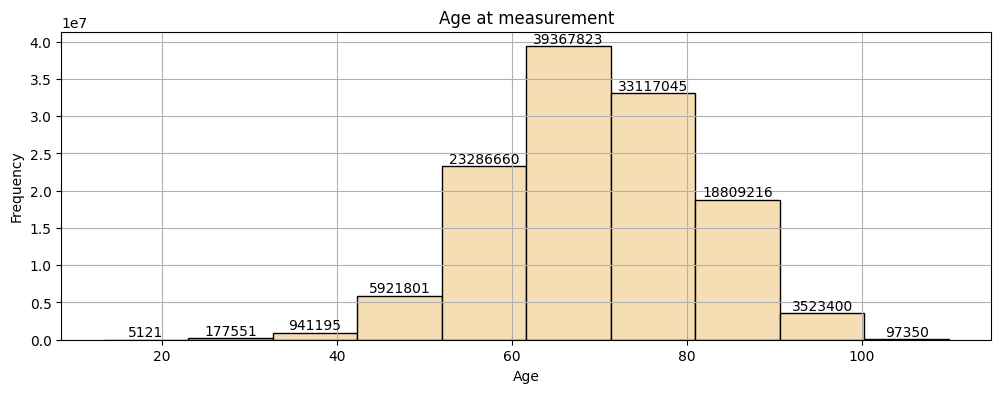

In [21]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at measurement']

# Create a histogram
plt.figure(figsize=(12, 4))
hist = plt.hist(age, bins=10, edgecolor='black', color='wheat')  # Adjust the number of bins as needed

# Add x-bar values to each bar with adjusted spacing
for i in range(len(hist[0])):
    plt.text(hist[1][i] + (hist[1][i+1] - hist[1][i])/2, hist[0][i] + 10, str(int(hist[0][i])), ha='center', va='bottom', color='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age at measurement')
plt.grid(True)  # Add grid lines
plt.show()

- The mean age at measurement is approximately 70 years old, which suggests that the majority of patients are elderly.
- The standard deviation of the age column is approximately 15 years, indicating that there is a significant variation in age among the patients.
- The minimum age at measurement is 13 years old, while the maximum is 109 years old, highlighting the wide range of ages represented in the dataset.
- The quartile values also show that 50% of the patients measured were between 61 and 77 years old.


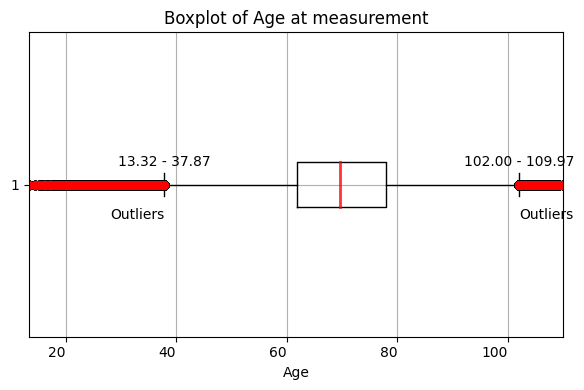

In [22]:
# Assuming you have an 'Age' column in your DataFrame
age = df['Age at measurement']

# Calculate outliers
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]

# Create a boxplot
plt.figure(figsize=(6, 4))
boxplot = plt.boxplot(age, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Age')
plt.title('Boxplot of Age at measurement')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(age), max(age)])
plt.xticks(ha='right')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(age):.2f} - {lower_bound:.2f}', ha='center', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(age):.2f}', ha='center', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

**Outlier Ages:** There are two ranges of outlier ages in the dataset. One range is between 13 and 37, and the other range is between 102 and 109.

---

## 5. Exploring Object-type features

In [23]:
df.describe(include=['object'])

,Measurement,Result textual,State
count,125247162,22844004,125247162
unique,10,39896,51
top,Pain,Unavailable,Texas
freq,23633224,147201,10400308


### Measurement

In [24]:
df['Measurement'].value_counts()

Pain                       23633224
Blood pressure             22601676
Pulse                      21684496
Respiratory rate           17678169
Temperature                17215399
Pulse oximetry             11441793
Weight                      7907380
Height                      2999240
Circumference/girth           53019
Central venous pressure       32766
Name: Measurement, dtype: int64

- The most frequently recorded measurement type is **"Pain"** with a count of 204,430. This suggests that pain measurements were consistently captured throughout the dataset. 

- Following closely behind is the measurement type **"Blood pressure"** with a count of 196,502, indicating that blood pressure assessments were also conducted frequently.

- Less frequently recorded measurements include **"Height"** with a count of 21,820, **"Circumference/girth"** with a count of 508, and **"Central venous pressure"** with a count of 236. These measurement types were captured in relatively smaller numbers within the dataset.

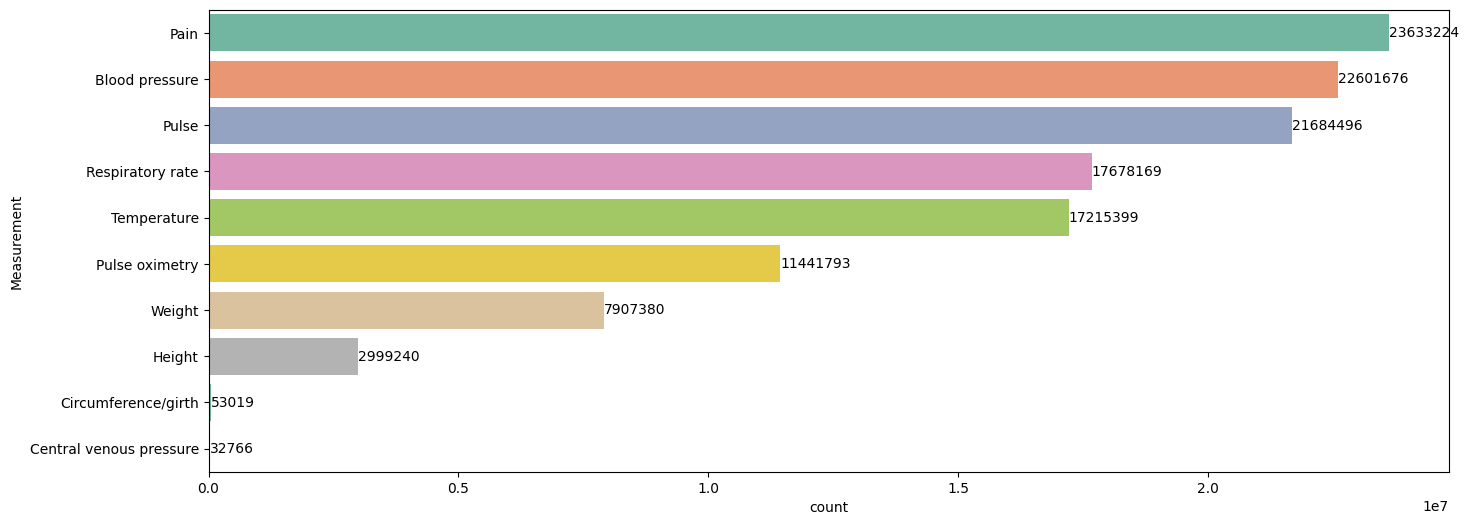

In [25]:
# Generate a frequency table of the categorical variable
freq_table = df['Measurement'].value_counts()

plt.figure(figsize=(16, 6))  # Adjust the width and height as needed

# Define a custom color palette with different colors for each category
custom_palette = sns.color_palette("Set2", n_colors=len(freq_table))

# Plot the frequency table using Seaborn's countplot function with the custom color palette
ax = sns.countplot(y='Measurement', data=df, order=freq_table.index[:20], palette=custom_palette)

# Add count labels to the bars
for i, count in enumerate(freq_table[:20]):
    ax.text(count, i, str(count), va='center')

# Display the plot
plt.show()

### Result textual

In [ ]:
measurements_train_data['Result textual'].value_counts()

Unavailable    147201
Refused        130328
130/70          50994
120/70          50356
130/80          48992
                ...  
206/51              1
127/ 60             1
145/87/58           1
137/87/69           1
157/146             1
Name: Result textual, Length: 39896, dtype: int64

- **Refused:** There are 1368 instances where the result value is marked as "Refused." This could indicate cases where individuals declined or refused to provide the required measurement.

- **Unavailable:** There are 1310 instances where the result value is marked as "Unavailable." This suggests that the measurement data was not available or could not be obtained for these instances.

- **130/70:** There are 398 instances where the result value is recorded as "130/70." This represents blood pressure measurements, with the systolic pressure of 130 and the diastolic pressure of 70.

Likewise remaining measurements.

In [34]:
# convert non-numeric values to NaN (missing values)
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')

In [35]:
# Drop all NaN or Unavailable or Refused data
df.dropna(subset=['Result'], inplace=True)

In [36]:
#shape of the whole data without NaN values
df.shape

(102380788, 4)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102380788 entries, 0 to 125247161
Data columns (total 4 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Internalpatientid   int64  
 1   Age at measurement  float64
 2   Measurement         object 
 3   Result              float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.8+ GB


### Pulse

In [18]:
# Filter the dataset for rows where Measurement is "Pulse"
pulse_df = df[df['Measurement'] == 'Pulse']
pulse_df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual
2,1,59.124538,2003-05-21 00:27:01,Pulse,74.0,None
11,1,61.907156,2006-03-03 01:34:22,Pulse,51.0,None
14,1,67.698135,2011-12-18 16:02:35,Pulse,77.0,None
22,1,68.304132,2012-07-27 03:50:40,Pulse,45.0,None
28,1,68.344198,2012-08-10 19:18:08,Pulse,50.0,None
...,...,...,...,...,...,...
125247135,99999,96.139480,2013-01-19 23:31:04,Pulse,73.0,None
125247140,99999,96.188334,2013-02-06 20:03:44,Pulse,60.0,None
125247150,99999,96.314751,2013-03-25 00:59:32,Pulse,86.0,None
125247156,99999,96.326070,2013-03-29 04:17:14,Pulse,77.0,None


In [19]:
pulse_df['Internalpatientid'].nunique()

132176

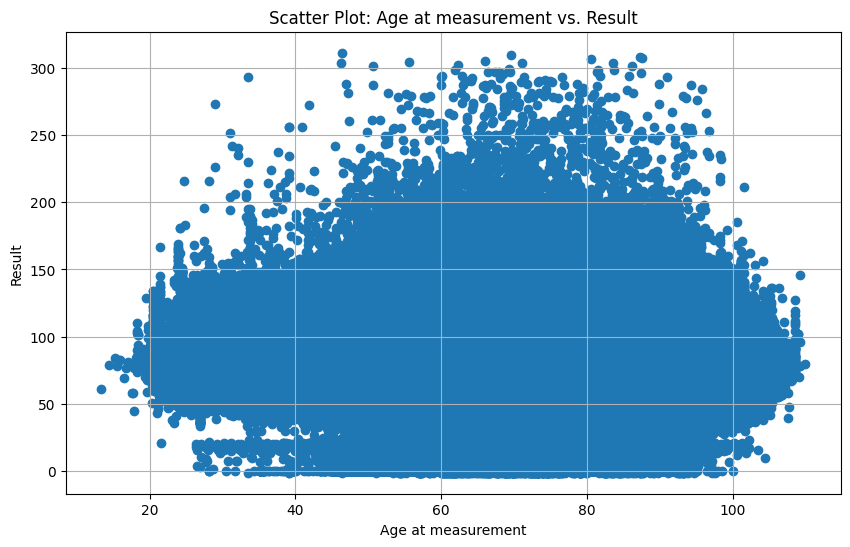

In [39]:
# Filter the dataframe to remove result values greater than 500
filtered_df = pulse_df[pulse_df['Result'] <= 500]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Age at measurement'], filtered_df['Result'])
plt.xlabel('Age at measurement')
plt.ylabel('Result')
plt.title('Scatter Plot: Age at measurement vs. Result')
plt.grid(True) # Add grid lines

# Set y-label range between 0 and 300 with intervals of 50
plt.yticks(range(0, 301, 50))

plt.show()

- The average resting pulse rate for a healthy adult is typically between 60 and 100 beats per minute (bpm). 

In [20]:
count = pulse_df[pulse_df['Result numeric'] > 220]

In [21]:
percentage = (count.shape[0] / pulse_df.shape[0]) * 100
print(f"Percentage: {percentage:.3f}%")

Percentage: 0.003%


In [79]:
count

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
15449,100048,81.744855,Pulse,187.0,None
18689,100048,81.744554,Pulse,174.0,None
28299,100098,59.555770,Pulse,155.0,None
31524,100048,81.423140,Pulse,193.0,None
33505,100155,91.012251,Pulse,152.0,None
...,...,...,...,...,...
125236214,99986,74.819576,Pulse,164.0,None
125236215,99986,74.819775,Pulse,152.0,None
125240234,99973,58.477632,Pulse,157.0,None
125242355,99879,87.915272,Pulse,184.0,None


In [69]:
count['Result numeric'].max()

56325700939957.0

In [142]:
count['Result numeric'].min()

201.0

In [80]:
count['Internalpatientid'].nunique()

8117

In [56]:
df['Internalpatientid'].nunique()

132289

In [ ]:
pulse_df[pulse_df['Result numeric'] > 200]

### Pain

In [57]:
# Filter the dataset for rows where Measurement is "Pain"
pain_df = df[df['Measurement'] == 'Pain']
pain_df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
1,1,59.124538,2003-05-21 00:27:01,Pain,3.0,None,Indiana
10,1,61.907156,2006-03-03 01:34:22,Pain,0.0,None,Indiana
13,1,67.698135,2011-12-18 16:02:35,Pain,0.0,None,Indiana
20,1,68.304132,2012-07-27 03:50:40,Pain,0.0,None,Indiana
26,1,68.344198,2012-08-10 19:18:08,Pain,0.0,None,Indiana
...,...,...,...,...,...,...,...
125247112,99999,94.355081,2011-04-08 18:46:19,Pain,0.0,None,California
125247124,99999,94.651241,2011-07-26 00:41:05,Pain,0.0,None,California
125247128,99999,95.646685,2012-07-23 20:43:21,Pain,0.0,None,California
125247134,99999,96.139480,2013-01-19 23:31:04,Pain,0.0,None,Arizona


In [41]:
pain_df['Result'].value_counts().head(10)

0.0     12220128
7.0      1535196
5.0      1484290
6.0      1370103
8.0      1353263
3.0      1178179
4.0      1153523
1.0      1018089
2.0       881424
10.0      529203
Name: Result, dtype: int64

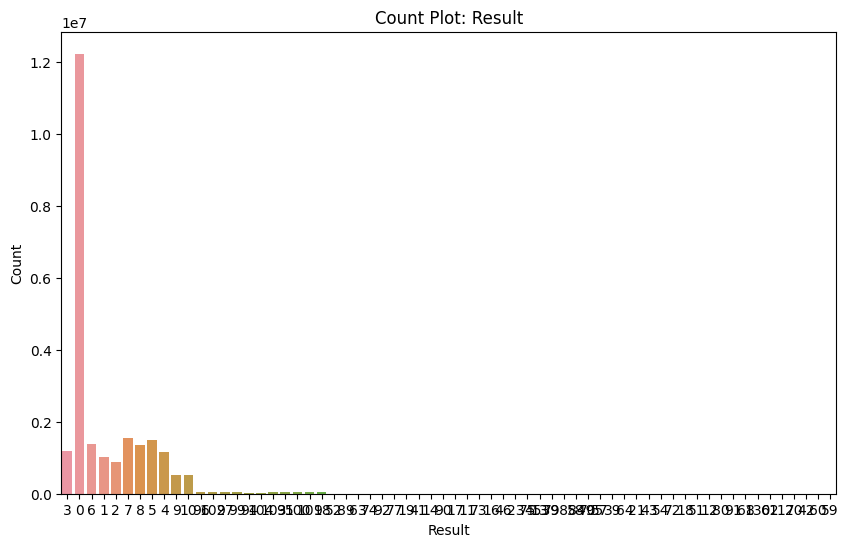

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pain_df, x=pain_df['Result'].map(int).astype(str))
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Count Plot: Result')
plt.show()

- Commonly used pain scales numerical rating scales, such as the 0-10 scale.
- Therefore, values other than those on the pain scale are considered either mistakenly recorded or potential outliers.

In [58]:
count = pain_df[pain_df['Result numeric'] > 10]

In [59]:
count['Internalpatientid'].nunique()

30102

In [60]:
df['Internalpatientid'].nunique()

132289

In [ ]:
# pain > 10 put it as 10

### Blood pressure

In [43]:
# Filter the dataset for rows where Measurement is "Blood pressure"
#blood_pressure_df = df[df['Measurement'] == 'Blood pressure']
#blood_pressure_df

,Internalpatientid,Age at measurement,Measurement,Result
25237944,138543,79.166307,Blood pressure,19.000000
25328686,138543,79.166238,Blood pressure,16.000000
25385058,138543,79.166298,Blood pressure,16.000000
25394528,138543,79.166236,Blood pressure,15.000000
35181559,153278,73.448744,Blood pressure,140.609669
36749654,127577,79.127826,Blood pressure,16.000000
50206511,138543,79.166311,Blood pressure,17.000000
50632015,25151,73.537492,Blood pressure,214.000000
51675055,138543,79.166232,Blood pressure,15.000000
51675062,138543,79.166293,Blood pressure,15.000000


- These values are not Blood pressure values these values are may entered mistakenly.
- Blood pressure values are not present in the Result column because I have changed the type of this column Object type into Numeric. If it is need in Blood pressure column analysis then do further.

### Respiratory rate

In [82]:
# Filter the dataset for rows where Measurement is "Respiratory rate"
respiratory_rate_df = df[df['Measurement'] == 'Respiratory rate']
respiratory_rate_df

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
3,1,59.124538,Respiratory rate,16.0,None
8,1,61.907156,Respiratory rate,15.0,None
15,1,67.698135,Respiratory rate,20.0,None
21,1,68.304132,Respiratory rate,20.0,None
25,1,68.344198,Respiratory rate,23.0,None
...,...,...,...,...,...
125247136,99999,96.139480,Respiratory rate,15.0,None
125247144,99999,96.188334,Respiratory rate,19.0,None
125247151,99999,96.314751,Respiratory rate,20.0,None
125247154,99999,96.326070,Respiratory rate,17.0,None


In [95]:
respiratory_rate_df.Internalpatientid.nunique()

131175

In [45]:
result_counts = respiratory_rate_df['Result'].value_counts()
result_table = pd.DataFrame({'Result': result_counts.index, 'Count': result_counts.values})

# Get the starting 10 values
start_values = result_table.head(10)

# Get the ending 10 values
end_values = result_table.tail(10)

# Concatenate the starting and ending values
res_count_values = pd.concat([start_values, end_values])

res_count_values

,Result,Count
0,18.000000,3732257
1,19.000000,3028243
2,20.000000,2923944
3,17.000000,2157850
4,16.000000,1755329
5,21.000000,1632929
6,15.000000,628942
7,22.000000,336562
8,23.000000,313826
9,14.000000,233616


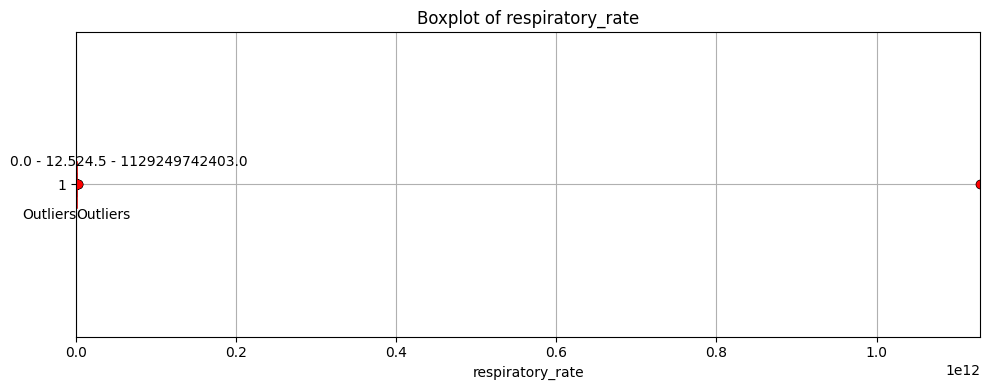

In [46]:
# Calculate outliers
respiratory_rate = respiratory_rate_df['Result']
q1 = np.percentile(respiratory_rate, 25)
q3 = np.percentile(respiratory_rate, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = respiratory_rate[(respiratory_rate < lower_bound) | (respiratory_rate > upper_bound)]

# Create a boxplot
plt.figure(figsize=(10, 4))
boxplot = plt.boxplot(respiratory_rate, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('respiratory_rate')
plt.title('Boxplot of respiratory_rate')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(respiratory_rate), max(respiratory_rate)])
plt.xticks(ha='center')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(respiratory_rate):.1f} - {lower_bound:.1f}', ha='right', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.1f} - {max(respiratory_rate):.1f}', ha='left', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

- The normal range for respiratory rate can vary depending on factors such as age, physical activity, and overall health. 
- In adults, the average normal respiratory rate is typically between 12 and 20 breaths per minute at rest.
- This column also has outliers like range starts from 0 to 12 and 24.5 -112924974203

In [109]:
count = respiratory_rate_df[respiratory_rate_df['Result numeric'] > 25]

In [110]:
count

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
1788,100032,90.724003,Respiratory rate,26.0,None
1829,100032,91.229838,Respiratory rate,26.0,None
2210,100046,71.958133,Respiratory rate,27.0,None
2229,100046,72.028019,Respiratory rate,31.0,None
2241,100046,72.078591,Respiratory rate,31.0,None
...,...,...,...,...,...
125244883,99933,69.209130,Respiratory rate,30.0,None
125244887,99933,69.211836,Respiratory rate,28.0,None
125244893,99933,69.250244,Respiratory rate,26.0,None
125245429,99950,73.854799,Respiratory rate,27.0,None


In [111]:
percentage = (count.shape[0] / pulse_df.shape[0]) * 100
print(f"Percentage: {percentage:.3f}%")

Percentage: 1.308%


In [112]:
count['Internalpatientid'].nunique()

52104

In [75]:
df['Internalpatientid'].nunique()

132289

### Temperature

In [76]:
# Filter the dataset for rows where Measurement is "Temperature"
temperature_df = df[df['Measurement'] == 'Temperature']
temperature_df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
0,1,59.124538,2003-05-21 00:27:01,Temperature,95.804066,None,Indiana
9,1,61.907156,2006-03-03 01:34:22,Temperature,98.432087,None,Indiana
17,1,67.698135,2011-12-18 16:02:35,Temperature,102.000000,None,Indiana
23,1,68.304132,2012-07-27 03:50:40,Temperature,97.711675,None,Indiana
27,1,68.344198,2012-08-10 19:18:08,Temperature,94.789678,None,Indiana
...,...,...,...,...,...,...,...
125247133,99999,96.139480,2013-01-19 23:31:04,Temperature,95.092719,None,Arizona
125247145,99999,96.188334,2013-02-06 20:03:44,Temperature,91.271475,None,Arizona
125247147,99999,96.314751,2013-03-25 00:59:32,Temperature,102.000000,None,Arizona
125247153,99999,96.326070,2013-03-29 04:17:14,Temperature,93.000000,None,Arizona


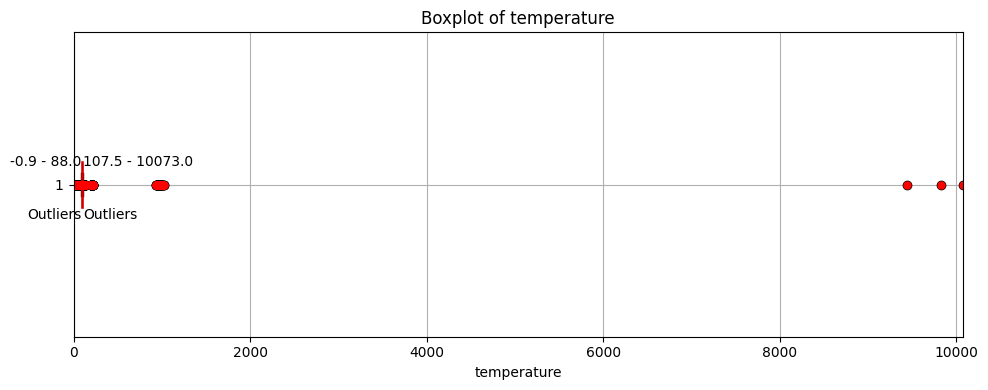

In [48]:
# Calculate outliers
temperature = temperature_df['Result']
q1 = np.percentile(temperature, 25)
q3 = np.percentile(temperature, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = temperature[(temperature < lower_bound) | (temperature > upper_bound)]

# Create a boxplot
plt.figure(figsize=(10, 4))
boxplot = plt.boxplot(temperature, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('temperature')
plt.title('Boxplot of temperature')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(temperature), max(temperature)])
plt.xticks(ha='center')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(temperature):.1f} - {lower_bound:.1f}', ha='right', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.1f} - {max(temperature):.1f}', ha='left', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

- The normal body temperature for adults is typically around 98.6°F (37°C).

- In some cases, a very high fever may refer to a body temperature of 103°F (39.4°C) or higher. It's important to note that fever alone does not always indicate the severity of an illness

In [77]:
count = temperature_df[temperature_df['Result numeric'] > 110]

In [78]:
count['Internalpatientid'].nunique()

253

In [79]:
df['Internalpatientid'].nunique()

132289

### Weight

In [17]:
df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
0,1,59.124538,2003-05-21 00:27:01,Temperature,95.804066,None,Indiana
1,1,59.124538,2003-05-21 00:27:01,Pain,3.000000,None,Indiana
2,1,59.124538,2003-05-21 00:27:01,Pulse,74.000000,None,Indiana
3,1,59.124538,2003-05-21 00:27:01,Respiratory rate,16.000000,None,Indiana
4,1,59.124538,2003-05-21 00:27:01,Blood pressure,NaN,140/96,Indiana
...,...,...,...,...,...,...,...
125247157,99999,96.341924,2013-04-03 23:21:35,Pulse oximetry,94.000000,None,Arizona
125247158,99999,96.341924,2013-04-03 23:21:35,Temperature,92.336347,None,Arizona
125247159,99999,96.341924,2013-04-03 23:21:35,Blood pressure,NaN,141/49,Arizona
125247160,99999,96.341924,2013-04-03 23:21:35,Respiratory rate,36.000000,None,Arizona


In [155]:
# Filter the dataset for rows where Measurement is "Weight"
weight_df = df[df['Measurement'] == 'Weight']
weight_df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
5,1,59.124538,2003-05-21 00:27:01,Weight,224.000000,None,Indiana
7,1,61.907156,2006-03-03 01:34:22,Weight,126.000000,None,Indiana
12,1,67.698135,2011-12-18 16:02:35,Weight,224.000000,None,Indiana
19,1,68.304132,2012-07-27 03:50:40,Weight,226.512919,None,Indiana
41,1,68.346211,2012-08-11 12:57:31,Weight,231.085802,None,Indiana
...,...,...,...,...,...,...,...
125247057,99999,91.321669,2008-03-26 01:40:58,Weight,255.000000,None,California
125247061,99999,91.841946,2008-10-02 05:32:46,Weight,249.000000,None,California
125247119,99999,94.651241,2011-07-26 00:41:05,Weight,190.976280,None,California
125247139,99999,96.139480,2013-01-19 23:31:04,Weight,207.000000,None,Arizona


**Weight Unit: Pounds**

- 1 pound (lb) is approximately equal to 0.45359237 kilograms (kg).

- To convert the weight value of 224 pounds to kilograms, you can multiply it by the conversion factor:

- 126 lb * 0.45359237 kg/lb ≈ 57.152 kg (rounded to three decimal places)

- Therefore, the weight of 126 pounds is approximately 57.152 kilograms. 

- 20 pounds weight = 9kg
- 200 pounds weight = 90kg
- 300 pounds weight = 136kg

In [156]:
count = weight_df[weight_df['Result numeric'] > 400]

In [157]:
count

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
1083,10003,61.000908,2008-08-12 19:57:42,Weight,480.187370,None,Texas
1088,10003,61.186940,2008-10-19 19:50:28,Weight,488.000000,None,Texas
1089,10003,61.219923,2008-10-31 21:09:47,Weight,472.853407,None,Texas
1151,10003,62.665875,2010-04-13 09:03:08,Weight,592.000000,None,Texas
1161,10003,62.808561,2010-06-04 12:41:44,Weight,936.823449,None,Texas
...,...,...,...,...,...,...,...
125238922,99948,58.219953,2006-05-24 09:25:37,Weight,410.482229,None,Wisconsin
125238923,99948,58.468930,2006-08-23 09:27:25,Weight,424.584250,None,Wisconsin
125238924,99948,58.871993,2007-01-17 17:07:14,Weight,430.625874,None,Wisconsin
125245404,99948,59.367013,2007-07-17 15:26:19,Weight,415.000000,None,Wisconsin


In [158]:
count['Internalpatientid'].nunique()

3598

In [91]:
df['Internalpatientid'].nunique()

132289

In [20]:
m_value_counts = weight_df['Result numeric'].value_counts()

In [48]:
m_value_counts

193.000000    31812
192.000000    31772
186.000000    31630
194.000000    31618
188.000000    31592
              ...  
151.615151        1
129.900488        1
150.548887        1
259.147644        1
190.798590        1
Name: Result numeric, Length: 4217780, dtype: int64

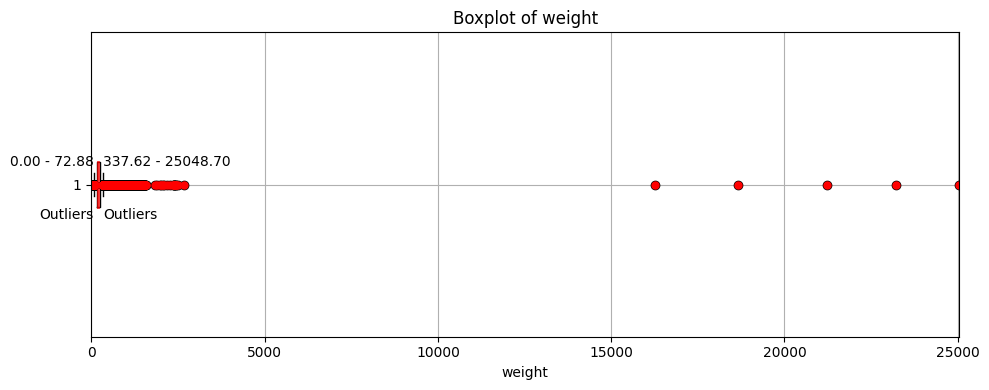

In [50]:
# Calculate outliers
weight = weight_df['Result']
q1 = np.percentile(weight, 25)
q3 = np.percentile(weight, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = weight[(weight < lower_bound) | (weight > upper_bound)]

# Create a boxplot
plt.figure(figsize=(10, 4))
boxplot = plt.boxplot(weight, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('weight')
plt.title('Boxplot of weight')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(weight), max(weight)])
plt.xticks(ha='center')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(weight):.2f} - {lower_bound:.2f}', ha='right', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(weight):.2f}', ha='left', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()

- 0 - 72 and 337 - 25048

### Pulse oximetry  

In [114]:
# Filter the dataset for rows where Measurement is "Pulse oximetry"
pulse_oximetry_df = df[df['Measurement'] == 'Pulse oximetry']
pulse_oximetry_df

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
24,1,68.344198,Pulse oximetry,89.0,None
34,1,68.344293,Pulse oximetry,93.0,None
37,1,68.345036,Pulse oximetry,99.0,None
45,1,68.352702,Pulse oximetry,103.0,None
53,1,72.274804,Pulse oximetry,97.0,None
...,...,...,...,...,...
125247137,99999,96.139480,Pulse oximetry,93.0,None
125247143,99999,96.188334,Pulse oximetry,96.0,None
125247149,99999,96.314751,Pulse oximetry,101.0,None
125247155,99999,96.326070,Pulse oximetry,99.0,None


In [203]:
pulse_oximetry_df.Internalpatientid.nunique()

110109

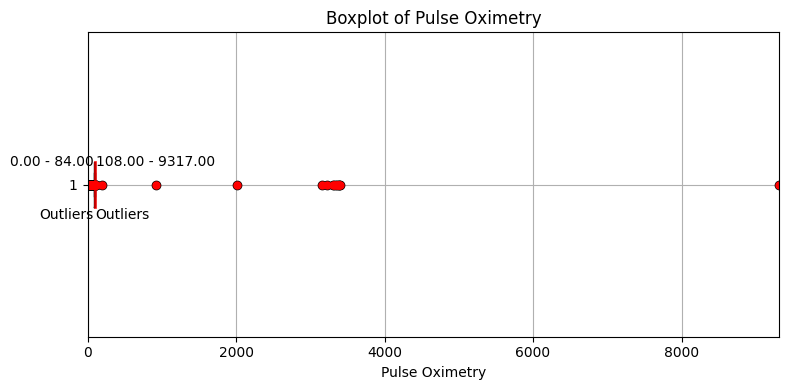

In [116]:
# Calculate outliers
pulse_oximetry = pulse_oximetry_df['Result numeric']
q1 = np.percentile(pulse_oximetry, 25)
q3 = np.percentile(pulse_oximetry, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = pulse_oximetry[(pulse_oximetry < lower_bound) | (pulse_oximetry > upper_bound)]

# Create a boxplot
plt.figure(figsize=(8, 4))
boxplot = plt.boxplot(pulse_oximetry, vert=False)

# Plot outliers separately
plt.plot(outliers, [1] * len(outliers), 'ro', markersize=5)

plt.xlabel('Pulse Oximetry')
plt.title('Boxplot of Pulse Oximetry')
plt.grid(True)  # Add grid lines

# Set the x-axis limits and ticks
plt.xlim([min(pulse_oximetry), max(pulse_oximetry)])
plt.xticks(ha='center')

# Annotate the start and end of outlier range on both sides
plt.text(lower_bound, 1.05, f'{min(pulse_oximetry):.2f} - {lower_bound:.2f}', ha='right', va='bottom', color='black')
plt.text(upper_bound, 1.05, f'{upper_bound:.2f} - {max(pulse_oximetry):.2f}', ha='left', va='bottom', color='black')

# Annotate the outlier range on the x-axis
plt.text(lower_bound, 0.9, 'Outliers', ha='right', va='center')
plt.text(upper_bound, 0.9, 'Outliers', ha='left', va='center')

# Rotate the image
for box in boxplot['medians']:
    box.set_color('red')  # Set median line color
    box.set_linewidth(2)  # Set median line width
    box.set_alpha(0.8)  # Set median line transparency

plt.tight_layout()  # Adjust spacing between elements
plt.show()


- The normal range for pulse oximetry, which measures the oxygen saturation level in the blood, is typically between 95% and 100%. 
- A reading of 95% or above is generally considered within the normal range. 

In [128]:
count = pulse_oximetry_df[pulse_oximetry_df['Result numeric'] > 105]

In [129]:
count

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
4901193,107321,68.497105,Pulse oximetry,3349.0,None
12582551,119209,80.750041,Pulse oximetry,107.0,None
17482253,126371,41.899015,Pulse oximetry,115.0,None
26080044,119020,85.629692,Pulse oximetry,110.0,None
26605380,140402,78.124457,Pulse oximetry,9317.0,None
43893293,166616,75.132330,Pulse oximetry,3318.0,None
43948879,166616,75.132303,Pulse oximetry,3388.0,None
44041010,166616,75.132350,Pulse oximetry,3388.0,None
57929177,144529,57.008825,Pulse oximetry,3302.0,None
68103865,52240,77.602865,Pulse oximetry,921.0,None


In [130]:
count['Internalpatientid'].nunique()

11

In [132]:
percentage = (count.shape[0] / pulse_df.shape[0]) * 100
print(f"Percentage: {percentage:.5f}%")

Percentage: 0.00008%


In [103]:
df['Internalpatientid'].nunique()

132289

### Circumference/girth 

In general, a healthy range for waist circumference in adults is typically considered to be below a certain threshold, such as 40 inches (102 cm) for men and 35 inches (88 cm) for women, although these values may vary based on different guidelines and populations.

In [204]:
# Filter the dataset for rows where Measurement is "Circumference/girth"
Circumference_df = df[df['Measurement'] == 'Circumference/girth']
Circumference_df

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
6895,100096,71.711141,Circumference/girth,56.000000,None
6972,100096,72.029573,Circumference/girth,57.820912,None
18185,100034,56.815481,Circumference/girth,35.786979,None
21971,100096,64.601749,Circumference/girth,51.000000,None
21975,100096,65.700194,Circumference/girth,49.323482,None
...,...,...,...,...,...
125219172,9983,56.773539,Circumference/girth,36.015553,None
125231857,99959,71.058249,Circumference/girth,33.000000,None
125231960,99966,65.333546,Circumference/girth,46.000000,None
125235392,99783,57.396325,Circumference/girth,53.000000,None


In [205]:
Circumference_df['Internalpatientid'].nunique()

9391

In [148]:
count = Circumference_df[Circumference_df['Result numeric'] < 10]

In [149]:
percentage = (count.shape[0] / pulse_df.shape[0]) * 100
print(f"Percentage: {percentage:.5f}%")

Percentage: 0.00503%


In [150]:
count

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
283018,100448,74.774038,Circumference/girth,7.602202,None
324367,100464,59.990509,Circumference/girth,6.243803,None
755345,101020,67.578414,Circumference/girth,9.003551,None
784159,101150,67.134178,Circumference/girth,6.479291,None
786095,101085,84.325295,Circumference/girth,6.000000,None
...,...,...,...,...,...
124465294,97345,50.330667,Circumference/girth,8.000000,None
124598509,98464,54.323822,Circumference/girth,7.464363,None
124826647,98324,70.268552,Circumference/girth,7.880956,None
124960089,99121,64.810764,Circumference/girth,3.201485,None


In [151]:
count['Internalpatientid'].nunique()

896

In [140]:
df['Internalpatientid'].nunique()

132281

### Height  

The height range for a "normal" person can vary based on several factors such as age, gender, and ethnicity. In general, for adults, the average height range for males is typically between 5 feet 7 inches (170 cm) and 6 feet (183 cm), while for females, it is between 5 feet 2 inches (157 cm) and 5 feet 6 inches (168 cm). 

In [159]:
# Filter the dataset for rows where Measurement is "Height"
Height_df = df[df['Measurement'] == 'Height']
Height_df

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
58,1,72.347579,2016-08-13 00:57:35,Height,70.000000,None,Indiana
100,10000,65.549141,2024-02-02 05:04:03,Height,75.000000,None,West Virginia
174,100001,78.113441,2004-02-04 11:06:04,Height,74.000000,None,North Carolina
209,100001,79.850404,2005-10-31 07:44:39,Height,66.966038,None,North Carolina
249,100002,71.933142,2004-10-22 13:31:16,Height,70.000000,None,Louisiana
...,...,...,...,...,...,...,...
125247032,99996,58.184120,2013-11-13 07:06:04,Height,69.000000,None,Georgia
125247059,99999,91.321669,2008-03-26 01:40:58,Height,72.000000,None,California
125247064,99999,91.841946,2008-10-02 05:32:46,Height,72.000000,None,California
125247120,99999,94.651241,2011-07-26 00:41:05,Height,71.000000,None,California


In [160]:
count = Height_df[Height_df['Result numeric'] > 90]

In [161]:
count

,Internalpatientid,Age at measurement,Measurement date,Measurement,Result numeric,Result textual,State
68833,100060,51.840567,1999-03-09 17:27:19,Height,91.000000,None,Florida
198432,100234,62.439566,2007-05-22 15:52:29,Height,91.000000,None,Florida
391672,10056,51.872685,2007-09-10 11:11:31,Height,100.000000,None,Florida
401803,100475,65.234335,2000-02-09 03:34:59,Height,95.000000,None,Texas
429109,100544,59.094604,2016-09-14 01:52:13,Height,93.000000,None,New York
...,...,...,...,...,...,...,...
125057548,99811,46.651215,2006-12-03 00:27:23,Height,102.000000,None,Arkansas
125093389,99733,91.735558,2025-01-20 08:18:55,Height,94.575971,None,Pennsylvania
125101709,98979,68.279192,2011-06-17 01:04:10,Height,92.000000,None,Georgia
125187589,99456,49.798173,2005-03-22 05:34:19,Height,95.000000,None,Georgia


In [162]:
count['Internalpatientid'].nunique()

1155

In [122]:
df['Internalpatientid'].nunique()

132289

### Central venous pressure

- The normal range for Central Venous Pressure can vary depending on various factors, including the individual's age, position, and underlying medical conditions. In general, a normal CVP value ranges between **2 to 8 mmHg (millimeters of mercury) when measured at the level of the right atrium.**

- However, it's important to note that the interpretation of CVP values should be done in the context of the patient's specific clinical condition. **Abnormalities in CVP, either higher or lower than the normal range, may indicate fluid overload, dehydration, heart failure, pulmonary hypertension, or other cardiovascular or circulatory disorders. The optimal CVP range for an individual patient may vary based on their unique circumstances and medical history, and it is best determined by a healthcare professional.**

In [206]:
# Filter the dataset for rows where Measurement is "Central venous pressure"
central_venous_pressure_df = df[df['Measurement'] == 'Central venous pressure']
central_venous_pressure_df 

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
5553,100008,67.635134,Central venous pressure,11.0,None
36764,10006,82.402255,Central venous pressure,96.0,None
74231,10003,66.593211,Central venous pressure,24.0,None
91794,100048,81.745359,Central venous pressure,100.0,None
118252,100091,74.212683,Central venous pressure,99.0,None
...,...,...,...,...,...
125162285,99339,63.603998,Central venous pressure,5.0,None
125162404,99339,63.843342,Central venous pressure,6.0,None
125174222,99394,79.536710,Central venous pressure,24.0,None
125198620,9990,36.374691,Central venous pressure,19.0,None


In [207]:
central_venous_pressure_df['Internalpatientid'].nunique() 

2967

In [199]:
count = central_venous_pressure_df [central_venous_pressure_df ['Result numeric'] < 100]

In [200]:
count

,Internalpatientid,Age at measurement,Measurement,Result numeric,Result textual
5553,100008,67.635134,Central venous pressure,11.000000,None
36764,10006,82.402255,Central venous pressure,96.000000,None
74231,10003,66.593211,Central venous pressure,24.000000,None
118252,100091,74.212683,Central venous pressure,99.000000,None
188422,100215,59.839402,Central venous pressure,16.933539,None
...,...,...,...,...,...
125162285,99339,63.603998,Central venous pressure,5.000000,None
125162404,99339,63.843342,Central venous pressure,6.000000,None
125174222,99394,79.536710,Central venous pressure,24.000000,None
125198620,9990,36.374691,Central venous pressure,19.000000,None


In [201]:
percentage = (count.shape[0] / pulse_df.shape[0]) * 100
print(f"Percentage: {percentage:.2f}%")

Percentage: 0.08%


In [202]:
count['Internalpatientid'].nunique()

2807

In [191]:
df['Internalpatientid'].nunique()

132281

---